# Sentiment Analysis with Google

**Initiate libraries:**

In [1]:
import pandas as pd

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

**Read in data from file:**

In [3]:
df = pd.read_csv("../data/processed/20191209233601.19044.gkg.Labeled.txt", sep='\t', index_col=0)
df.Date = pd.to_datetime(df.Date, format="%Y%m%d")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4089 entries, 0 to 4088
Data columns (total 13 columns):
Date             4089 non-null datetime64[ns]
NumArticles      4089 non-null int64
Counts           586 non-null object
Themes           4001 non-null object
Locations        4089 non-null object
Persons          3578 non-null object
Organizations    3771 non-null object
ToneData         4089 non-null object
CAMEOEvents      2222 non-null object
Sources          4089 non-null object
SourceURLs       4089 non-null object
text             3478 non-null object
label            4089 non-null int64
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 447.2+ KB


**Extract sentiment tone from sentiment data stored in `ToneData` column:**

In [5]:
df['Tone'] = df['ToneData'].apply(lambda x: float(x.split(',')[0]))

In [6]:
df_tone  = df[ (df.label == 0) | (df.label == 1) ]

In [7]:
bydatedf_tone = df_tone.groupby(['Date']).mean()

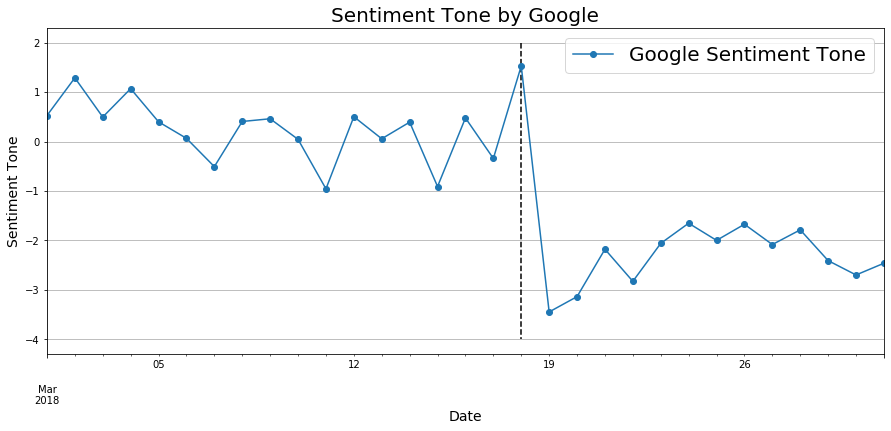

In [10]:
axe = bydatedf_tone[['Tone']].resample("1d").mean().plot(figsize=(15,6), marker='o')
axe.vlines(pd.Timestamp('2018-03-18'), 2, -4, linestyles='dashed', color='black')
axe.set_ylabel('Sentiment Tone', fontsize=14)
axe.set_xlabel('Date', fontsize=14)
axe.set_title('Sentiment Tone by Google', fontsize=20)
axe.legend(["Google Sentiment Tone"], fontsize=20)
axe.grid()
plt.savefig("Ggl_Tone_March2018.png")

In [11]:
df_tone[ df_tone['Date'] < pd.Timestamp('2018-03-18') ].shape

(491, 14)

In [12]:
df_tone[ df_tone['Date'] >= pd.Timestamp('2018-03-18') ].shape

(2048, 14)

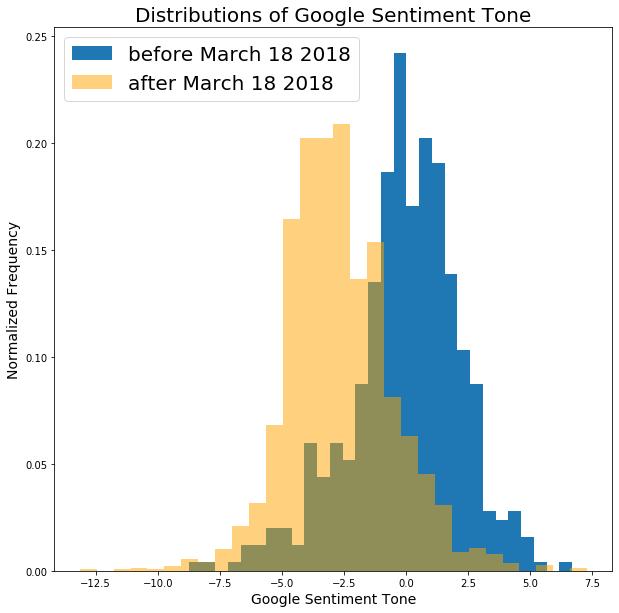

In [15]:
plt.hist(df_tone[ df_tone['Date'] < pd.Timestamp('2018-03-18') ]['Tone'], bins=30, density=True)
plt.hist(df_tone[ df_tone['Date'] >= pd.Timestamp('2018-03-18') ]['Tone'], bins=30, density=True, color="orange", alpha=0.5)
plt.xlabel('Google Sentiment Tone', fontsize=14)
plt.ylabel('Normalized Frequency', fontsize=14)
plt.title('Distributions of Google Sentiment Tone',fontsize=20)
plt.legend(["before March 18 2018","after March 18 2018"],fontsize=20)
plt.savefig("Ggl_ToneHist_March2018.png")
plt.show()